In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)


In [2]:
# Load the data
df = pd.read_csv('results/chunking/results_chunking_wikipedia.csv')

# Filter out baseline (use_first_chunk_only=True) for this comparison
df_chunked = df#[df['use_first_chunk_only'] == False].copy()

# Create a label for overlap values
df_chunked['overlap_label'] = df_chunked['overlap'].apply(lambda x: f'Overlap: {x}')

print(f"Loaded {len(df_chunked)} chunking experiments")
print(f"Chunk sizes: {sorted(df_chunked['chunk_size'].unique())}")
print(f"Overlap values: {sorted(df_chunked['overlap'].unique())}")
df_chunked[['chunk_size', 'overlap', 'mrr@1', 'mrr@3', 'recall@1', 'recall@3']].head(20)


Loaded 10 chunking experiments
Chunk sizes: [np.int64(256), np.int64(512), np.int64(1024)]
Overlap values: [np.int64(0), np.int64(25), np.int64(50), np.int64(100), np.int64(200)]


,chunk_size,overlap,mrr@1,mrr@3,recall@1,recall@3
0,256,0,0.950000,0.969792,0.950000,0.990625
1,256,25,0.965625,0.979167,0.965625,0.993750
2,256,50,0.956250,0.972396,0.956250,0.990625
3,512,0,0.943750,0.964583,0.943750,0.987500
4,512,50,0.940625,0.963542,0.940625,0.990625
5,512,100,0.943750,0.964063,0.943750,0.987500
6,1024,0,0.925000,0.955208,0.925000,0.990625
7,1024,100,0.943750,0.961979,0.943750,0.981250
8,1024,200,0.946875,0.969271,0.946875,0.996875
9,1024,0,0.828125,0.885938,0.828125,0.953125


In [3]:
df

,model_name,mrr@1,mrr@3,mrr@5,mrr@10,mrr@20,mrr@50,mrr@100,recall@1,recall@3,...,actual_cost_usd,estimated_tokens,doc_tokens_est,query_tokens_est,cpu_time_sec,gpu_time_sec,max_gpu_memory_allocated_mb,max_gpu_memory_reserved_mb,distance_metric,overlap_label
0,Qwen/Qwen3-Embedding-4B,0.950000,0.969792,0.971198,0.971545,0.971545,0.971545,0.971545,0.950000,0.990625,...,none,none,none,none,111.123431,304.391344,8985.327148,10354.0,cosine,Overlap: 0
1,Qwen/Qwen3-Embedding-4B,0.965625,0.979167,0.979948,0.980295,0.980295,0.980295,0.980295,0.965625,0.993750,...,none,none,none,none,58.180747,40.453375,8994.641113,10678.0,cosine,Overlap: 25
2,Qwen/Qwen3-Embedding-4B,0.956250,0.972396,0.973177,0.973568,0.973763,0.973763,0.973763,0.956250,0.990625,...,none,none,none,none,60.690728,43.502203,9001.338379,10156.0,cosine,Overlap: 50
3,Qwen/Qwen3-Embedding-4B,0.943750,0.964583,0.966771,0.966771,0.966771,0.966851,0.966851,0.943750,0.987500,...,none,none,none,none,55.908199,38.165758,10037.407227,12528.0,cosine,Overlap: 0
4,Qwen/Qwen3-Embedding-4B,0.940625,0.963542,0.964792,0.964792,0.964792,0.964792,0.964840,0.940625,0.990625,...,none,none,none,none,56.882221,39.461281,10101.758301,13284.0,cosine,Overlap: 50
5,Qwen/Qwen3-Embedding-4B,0.943750,0.964063,0.966250,0.966250,0.966250,0.966348,0.966348,0.943750,0.987500,...,none,none,none,none,57.708892,40.471848,10050.790527,12594.0,cosine,Overlap: 100
6,Qwen/Qwen3-Embedding-4B,0.925000,0.955208,0.956458,0.956458,0.956458,0.956458,0.956512,0.925000,0.990625,...,none,none,none,none,53.728094,36.864559,12137.594727,15436.0,cosine,Overlap: 0
7,Qwen/Qwen3-Embedding-4B,0.943750,0.961979,0.963385,0.964613,0.964613,0.964613,0.964665,0.943750,0.981250,...,none,none,none,none,56.089777,38.737703,11995.093262,15374.0,cosine,Overlap: 100
8,Qwen/Qwen3-Embedding-4B,0.946875,0.969271,0.969271,0.969271,0.969455,0.969455,0.969455,0.946875,0.996875,...,none,none,none,none,57.099503,39.448113,11879.462891,15060.0,cosine,Overlap: 200
9,Qwen/Qwen3-Embedding-4B,0.828125,0.885938,0.892656,0.894535,0.894819,0.894819,0.894819,0.828125,0.953125,...,none,none,none,none,39.103352,22.450947,9806.670410,10444.0,cosine,Overlap: 0


In [4]:
df.columns

Index(['model_name', 'mrr@1', 'mrr@3', 'mrr@5', 'mrr@10', 'mrr@20', 'mrr@50',
       'mrr@100', 'recall@1', 'recall@3', 'recall@5', 'recall@10', 'recall@20',
       'recall@50', 'recall@100', 'precision@1', 'precision@3', 'precision@5',
       'precision@10', 'precision@20', 'precision@50', 'precision@100',
       'avg_latency_sec', 'embedder', 'source', 'database', 'db_type',
       'use_first_chunk_only', 'chunk_size', 'overlap', 'num_docs',
       'num_chunks', 'experiment_time', 'docs_load_time_sec',
       'embedder_load_time_sec', 'prompt_mode', 'estimated_cost_usd',
       'actual_cost_usd', 'estimated_tokens', 'doc_tokens_est',
       'query_tokens_est', 'cpu_time_sec', 'gpu_time_sec',
       'max_gpu_memory_allocated_mb', 'max_gpu_memory_reserved_mb',
       'distance_metric', 'overlap_label'],
      dtype='object')

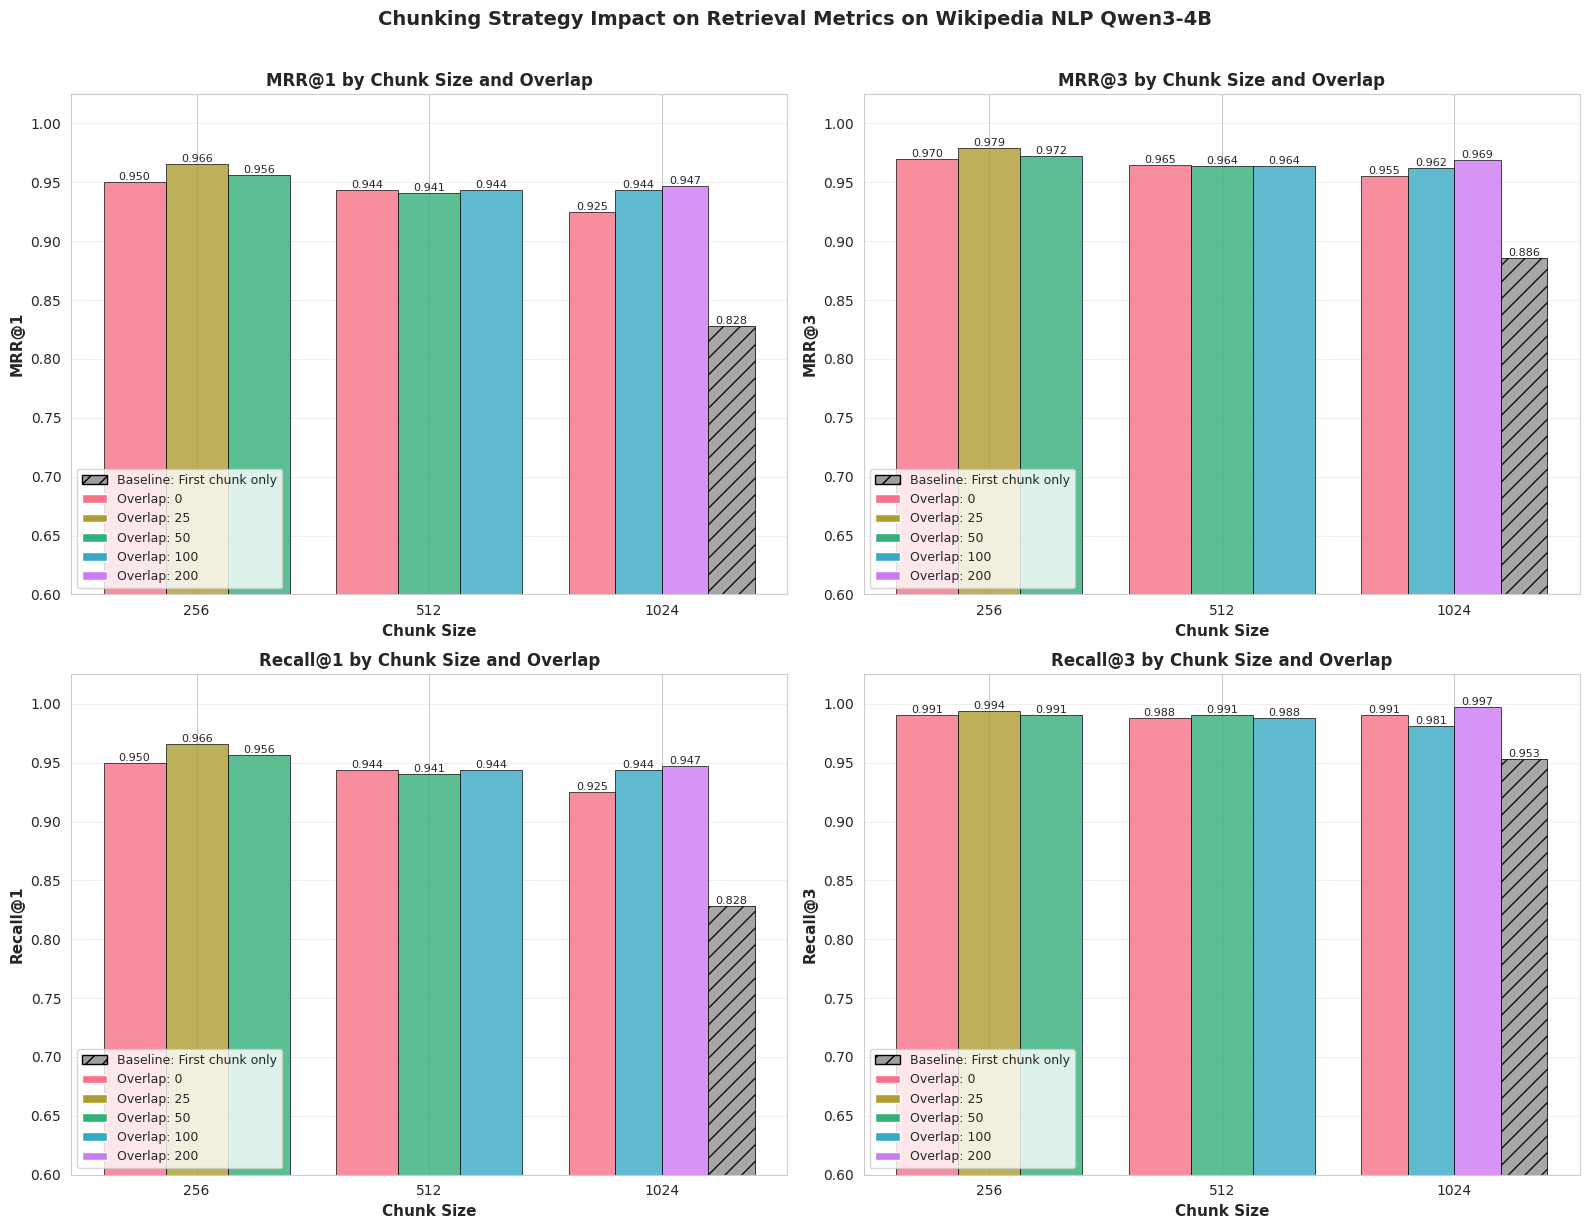

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# -----------------------
# Configuration
# -----------------------
metrics = ['mrr@1', 'mrr@3', 'recall@1', 'recall@3']
metric_labels = ['MRR@1', 'MRR@3', 'Recall@1', 'Recall@3']

baseline_color = '#9e9e9e'   # neutral gray
baseline_hatch = '//'

# -----------------------
# Figure setup
# -----------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

chunk_sizes = sorted(df_chunked['chunk_size'].unique())
overlaps = sorted(df_chunked['overlap'].unique())

colors = sns.color_palette("husl", len(overlaps))

# -----------------------
# Legend (manual, shared)
# -----------------------
legend_handles = [
    mpatches.Patch(
        facecolor=baseline_color,
        edgecolor='black',
        hatch=baseline_hatch,
        label='Baseline: First chunk only'
    )
]

for overlap in overlaps:
    legend_handles.append(
        mpatches.Patch(
            facecolor=colors[overlaps.index(overlap)],
            label=f'Overlap: {overlap}'
        )
    )

# -----------------------
# Plotting
# -----------------------
for idx, (metric, label) in enumerate(zip(metrics, metric_labels)):
    ax = axes[idx]
    x = np.arange(len(chunk_sizes))
    total_width = 0.8

    for xi, chunk_size in enumerate(chunk_sizes):
        subset = df_chunked[df_chunked['chunk_size'] == chunk_size]

        valid_overlaps = subset['overlap'].values
        values = subset[metric].values
        is_baseline = subset['use_first_chunk_only'].values  # 🔑 FIX

        n = len(valid_overlaps)
        width = total_width / n

        offsets = np.linspace(
            -total_width / 2 + width / 2,
            total_width / 2 - width / 2,
            n
        )

        for overlap, value, is_base, offset in zip(
            valid_overlaps, values, is_baseline, offsets
        ):
            if is_base:
                color = baseline_color
                hatch = baseline_hatch
                alpha = 0.9
            else:
                color = colors[overlaps.index(overlap)]
                hatch = None
                alpha = 0.8

            ax.bar(
                x[xi] + offset,
                value,
                width,
                color=color,
                hatch=hatch,
                alpha=alpha,
                edgecolor='black',
                linewidth=0.6
            )

            ax.text(
                x[xi] + offset,
                value,
                f'{value:.3f}',
                ha='center',
                va='bottom',
                fontsize=8
            )

    ax.set_xlabel('Chunk Size', fontsize=11, fontweight='bold')
    ax.set_ylabel(label, fontsize=11, fontweight='bold')
    ax.set_title(f'{label} by Chunk Size and Overlap', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(chunk_sizes)
    ax.set_ylim([0.6, 1.025])
    ax.grid(True, axis='y', alpha=0.3)

    ax.legend(handles=legend_handles, loc='lower left', fontsize=9)

# -----------------------
# Final layout
# -----------------------
plt.tight_layout()
plt.suptitle(
    'Chunking Strategy Impact on Retrieval Metrics on Wikipedia NLP Qwen3-4B',
    fontsize=14,
    fontweight='bold',
    y=1.02
)
plt.subplots_adjust(top=0.95)
plt.show()
